In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [160]:
filename = "superstore.csv"

In [170]:
df = pd.read_csv(filename, parse_dates=['Order Date', 'Ship Date']).sort_values(by='Order Date')

In [171]:
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
18174,18175,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
10935,10936,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
10933,10934,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
10934,10935,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
11953,11954,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
15521,15522,CA-2014-130813,2014-01-06,2014-01-08,Second Class,LS-17230,Lycoris Saunders,Consumer,United States,Los Angeles,...,90049,West,OFF-PA-10002005,Office Supplies,Paper,Xerox 225,19.440,3,0.0,9.3312
17668,17669,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,42420,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078
17669,17670,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,42420,South,OFF-BI-10004632,Office Supplies,Binders,Ibico Hi-Tech Manual Binding System,609.980,2,0.0,274.4910
17670,17671,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,42420,South,OFF-AR-10001662,Office Supplies,Art,Rogers Handheld Barrel Pencil Sharpener,5.480,2,0.0,1.4796
17374,17375,CA-2014-106054,2014-01-06,2014-01-07,First Class,JO-15145,Jack O'Briant,Corporate,United States,Athens,...,30605,South,OFF-AR-10002399,Office Supplies,Art,"Dixon Prang Watercolor Pencils, 10-Color Set w...",12.780,3,0.0,5.2398


In [172]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

## Unique Segments

In [173]:
set(df.Segment.values.tolist())

{'Consumer', 'Corporate', 'Home Office'}

In [174]:
consumer_seg = df[df.Segment.eq("Consumer")]
corporate_seg = df[df.Segment.eq("Corporate")]
home_off_seg = df[df.Segment.eq("Home Office")]

In [175]:
def getFrequencies(df):
    prod_freq_map = {}
    for prod_id, sub_df in df.groupby("Category"):
        prod_freq_map[prod_id] = sum(sub_df.Quantity)
    prod_freq_map = dict(sorted(prod_freq_map.items(), key=lambda item: item[1], reverse=True))
    return prod_freq_map

In [176]:
getFrequencies(home_off_seg)

{'Office Supplies': 13287, 'Furniture': 4586, 'Technology': 3989}

In [177]:
y1 = np.array(list(getFrequencies(df[df.Segment.eq("Consumer")]).values()))
y2 = np.array(list(getFrequencies(df[df.Segment.eq("Corporate")]).values()))
y3 = np.array(list(getFrequencies(df[df.Segment.eq("Home Office")]).values()))

### Frq can be determined in different ways: the number of unique people that that bought it, the total number of sales 

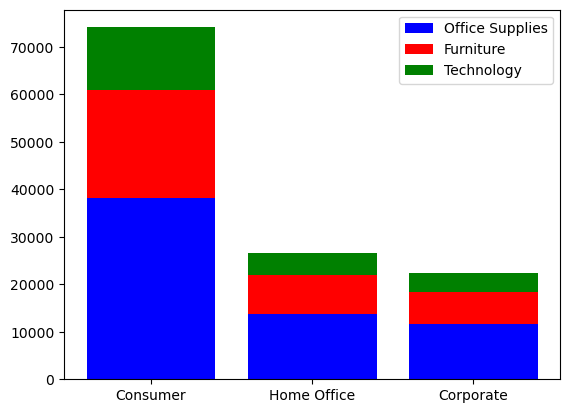

In [207]:
plt.bar(x, y1, color='b', label='Office Supplies')
plt.bar(x, y2, bottom=y1, color='r', label='Furniture')
plt.bar(x, y3, bottom=y1+y2, color='green', label='Technology')
plt.legend()
plt.show()

In [208]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
18174,18175,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
10935,10936,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
10933,10934,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
10934,10935,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
11953,11954,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30377,30378,US-2024-143259,2024-12-30,2025-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
30378,30379,US-2024-115427,2024-12-30,2025-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750
30379,30380,US-2024-156720,2024-12-30,2025-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,...,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048
30380,30381,US-2024-143259,2024-12-30,2025-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279


In [209]:
len(df["Product ID"].unique())

1862

In [210]:
len(df["Sub-Category"].unique())

17

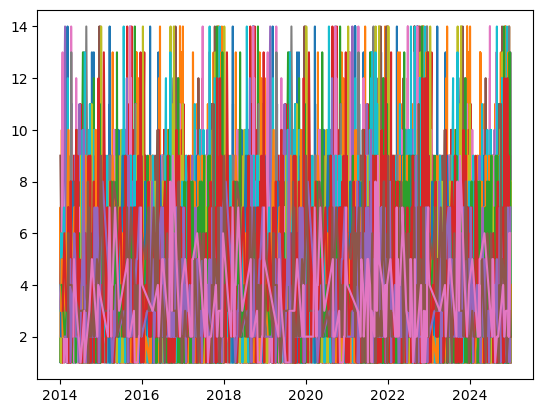

In [211]:
for subcat in df["Sub-Category"].unique():
    plt.plot(df[df["Sub-Category"].eq(subcat)]["Order Date"], df[df["Sub-Category"].eq(subcat)].Quantity)

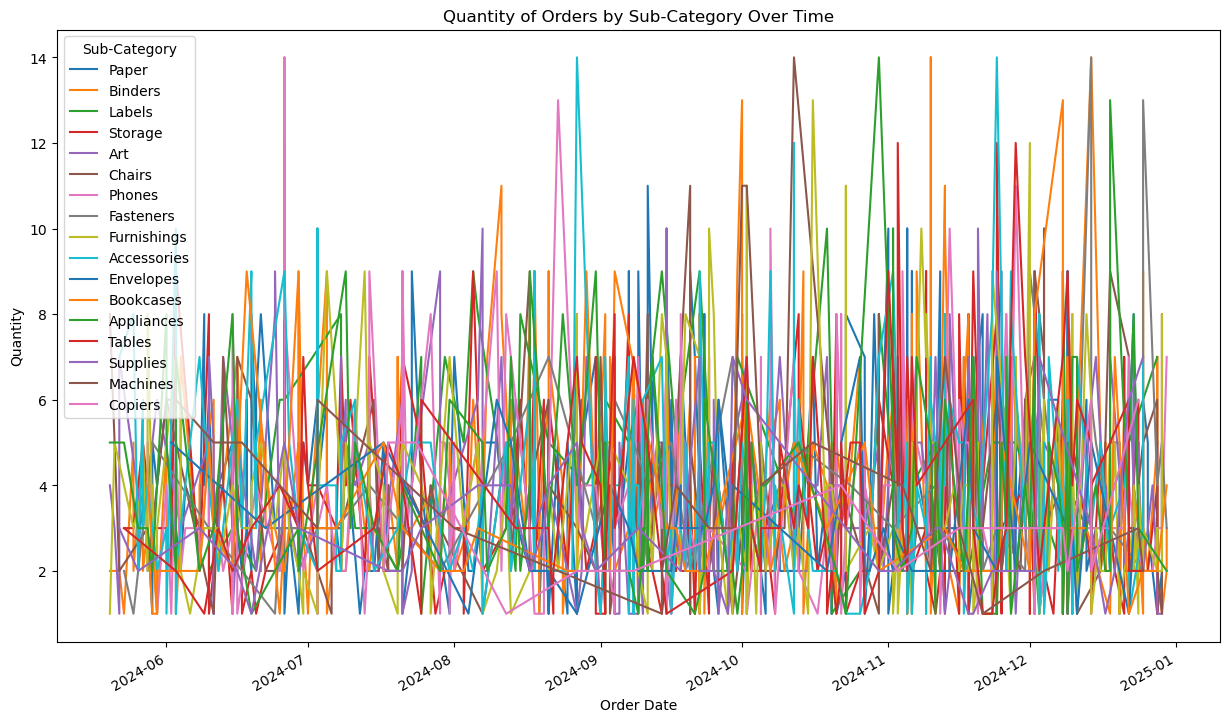

In [218]:
fig, ax = plt.subplots(figsize=(15, 9))

# Plot each sub-category
for subcat in df["Sub-Category"].unique():
    dcp = df.iloc[30000:]
    subcat_data = dcp[ dcp["Sub-Category"].eq(subcat) ]
    ax.plot(subcat_data["Order Date"], subcat_data["Quantity"], label=subcat)

ax.set_xlabel('Order Date')
ax.set_ylabel('Quantity')
ax.set_title('Quantity of Orders by Sub-Category Over Time')

ax.legend(title='Sub-Category')

fig.autofmt_xdate()

plt.show()


/var/folders/f9/_qqxh74j2vx_9np7_11nm75c0000gn/T/ipykernel_29682/3275437775.py:33: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.autofmt_xdate()


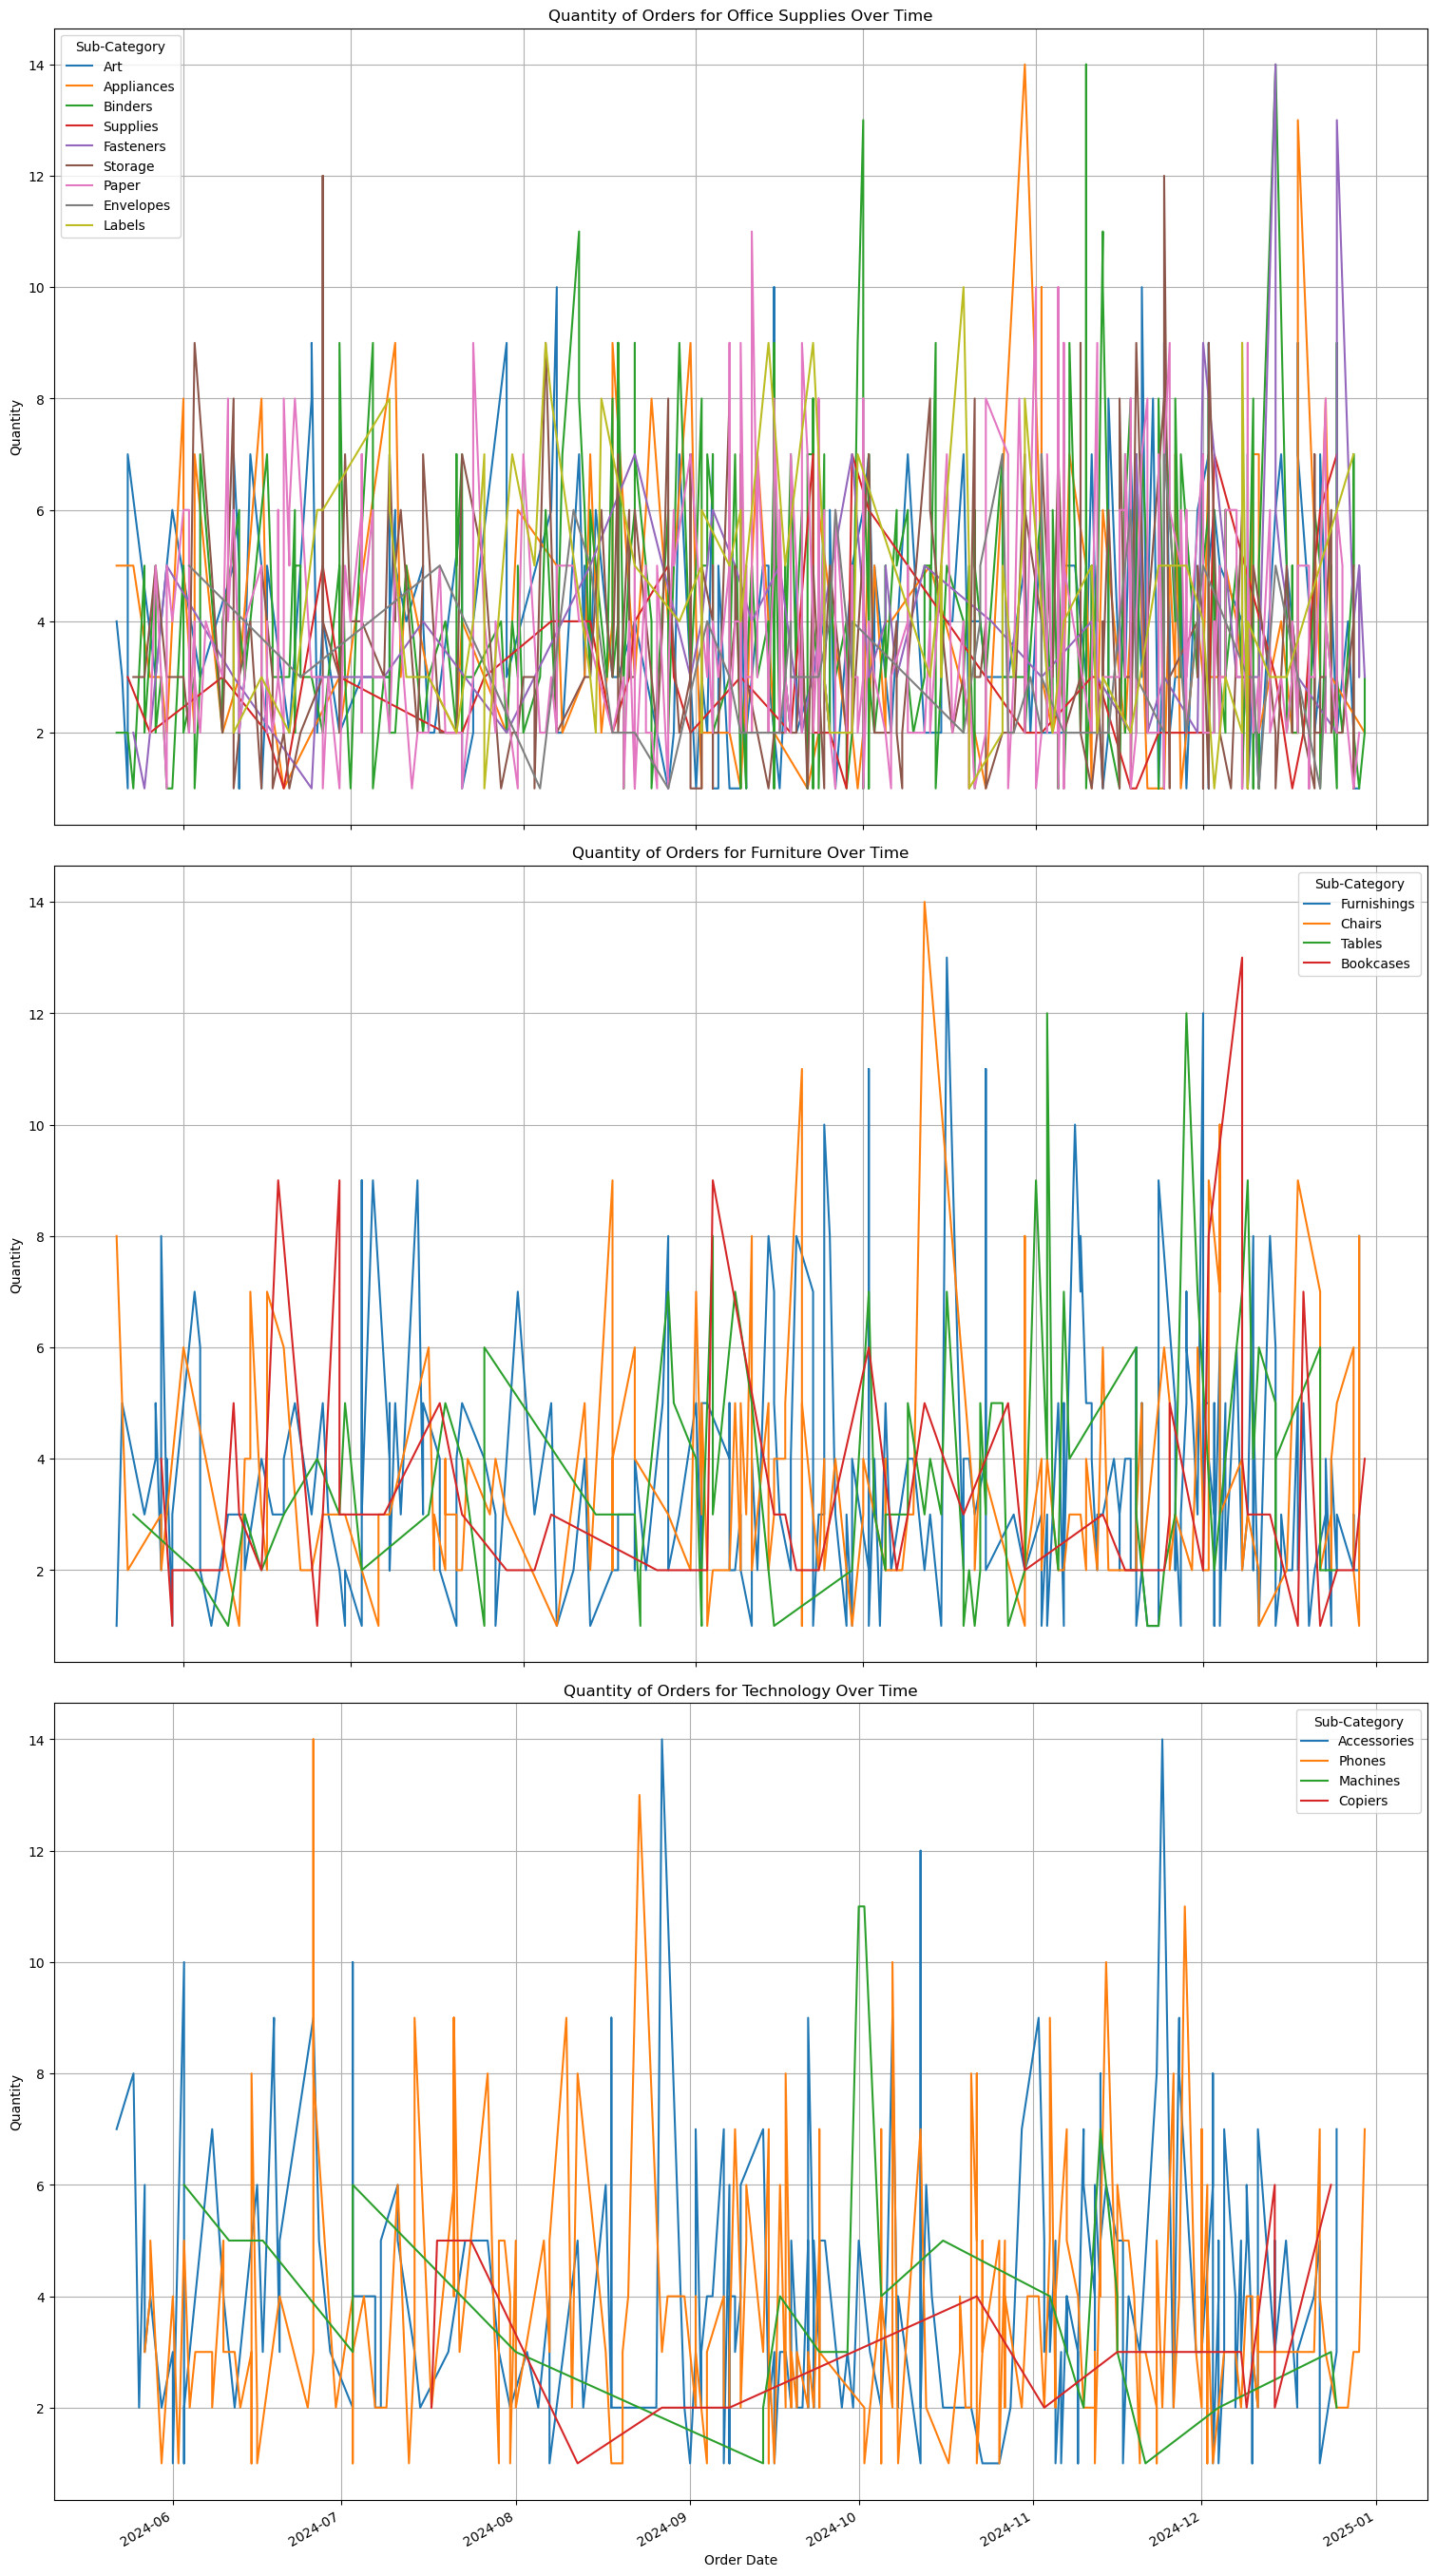

In [219]:
import matplotlib.pyplot as plt
import pandas as pd

unique_categories = df["Category"].unique()
num_categories = len(unique_categories)
fig, axs = plt.subplots(num_categories, 1, figsize=(15, 9 * num_categories), constrained_layout=True)

if num_categories == 1:
    axs = [axs]

# Plot each sub-category
for i, category in enumerate(unique_categories):
    dcp = df.iloc[30000:]
    category_data = dcp[dcp["Category"].eq(category)]
    unique_subcategories = category_data["Sub-Category"].unique()

    for subcat in unique_subcategories:
        subcat_data = category_data[category_data["Sub-Category"].eq(subcat)]
        axs[i].plot(subcat_data["Order Date"], subcat_data["Quantity"], label=subcat)

    axs[i].set_xlabel('Order Date')
    axs[i].set_ylabel('Quantity')
    axs[i].set_title(f'Quantity of Orders for {category} Over Time')
    axs[i].legend(title='Sub-Category')
    axs[i].grid(True)

    fig.autofmt_xdate()

plt.show()


In [214]:
df.iloc[20000]

Row ID                                   6290
Order ID                       US-2021-119963
Order Date                2021-11-18 00:00:00
Ship Date                 2021-11-22 00:00:00
Ship Mode                      Standard Class
Customer ID                          SN-20710
Customer Name                    Steve Nguyen
Segment                           Home Office
Country                         United States
City                                 Pasadena
State                                   Texas
Postal Code                             77506
Region                                Central
Product ID                    OFF-AR-10003514
Category                      Office Supplies
Sub-Category                              Art
Product Name     4009 Highlighters by Sanford
Sales                                   6.368
Quantity                                    2
Discount                                  0.2
Profit                                 1.0348
Name: 6289, dtype: object

In [222]:
from darts import TimeSeries
from darts.models import ExponentialSmoothing

df.drop(['Row ID', 'Ship Date', 'Ship Mode', 'Country', 'City', 'State', 'Postal Code', 'Region'], axis=1, inplace = True)

"""df.columns = ['Date', 'adult_cattle(head)','Bulls Bullocks & Steers(head)', 'Cows&Heifers(head)',
              'Calves(head)', 'Beef(tonnes)', 'Veal(tonnes)','Adult cattle(kg/head)', 'Calves(kg/head)',
              'aust-avg_rain','US/AUS_ExchangeRate', 'sales_index', 'retail_sales_index']"""

df.drop_duplicates(subset=['Order Date'], inplace=True)

series = TimeSeries.from_dataframe(df, 'Order Date', 'Sales').values

train, val = series.split_before(pd.Timestamp('2022-01-01'))
model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))

series.plot(label='actual')
prediction.plot(label='forecast', lw=2)
plt.legend()

ValueError: The time index of the provided DataArray is missing the freq attribute, and the frequency could not be directly inferred. This probably comes from inconsistent date frequencies with missing dates. If you know the actual frequency, try setting `fill_missing_dates=True, freq=actual_frequency`. If not, try setting `fill_missing_dates=True, freq=None` to see if a frequency can be inferred.


ValueError: The time index of the provided DataArray is missing the freq attribute, and the frequency could not be directly inferred. This probably comes from inconsistent date frequencies with missing dates. If you know the actual frequency, try setting `fill_missing_dates=True, freq=actual_frequency`. If not, try setting `fill_missing_dates=True, freq=None` to see if a frequency can be inferred.

In [220]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')